<a href="https://colab.research.google.com/github/manisha9608/animal-image-classification/blob/main/animal_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Import Libraries/Dataset

## 1.1 Import Libraries

In [125]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
from numpy import argmax
import random
import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import keras

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

## 1.2 Import data

In [126]:
pwd

'/content'

In [127]:
df = pd.DataFrame(columns=["path","label"])

path = "/content/drive/MyDrive/data/animals/"

for i in os.listdir(path + "cats"):
    df = df.append({"path":path+"cats/"+i,"label":"cat"},ignore_index=True)

for i in os.listdir(path + "dogs"):
    df = df.append({"path":path+"dogs/"+i,"label":"dog"},ignore_index=True)

for i in os.listdir(path + "panda"):
    df = df.append({"path":path+"panda/"+i,"label":"panda"},ignore_index=True)
    
df.head(5)

,path,label
0,/content/drive/MyDrive/data/animals/cats/cats_...,cat
1,/content/drive/MyDrive/data/animals/cats/cats_...,cat
2,/content/drive/MyDrive/data/animals/cats/cats_...,cat
3,/content/drive/MyDrive/data/animals/cats/cats_...,cat
4,/content/drive/MyDrive/data/animals/cats/cats_...,cat


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    3000 non-null   object
 1   label   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


## 1.3 Check GPU Availability


In [129]:
tf.test.gpu_device_name()

''

# 2. Data Visualization and processing

## 2.1 Plot samples

### 2.1.1 Cats



In [130]:
cats_df = df[df['label'] == 'cat'].reset_index(drop=True)
cats_df.head(5)

,path,label
0,/content/drive/MyDrive/data/animals/cats/cats_...,cat
1,/content/drive/MyDrive/data/animals/cats/cats_...,cat
2,/content/drive/MyDrive/data/animals/cats/cats_...,cat
3,/content/drive/MyDrive/data/animals/cats/cats_...,cat
4,/content/drive/MyDrive/data/animals/cats/cats_...,cat


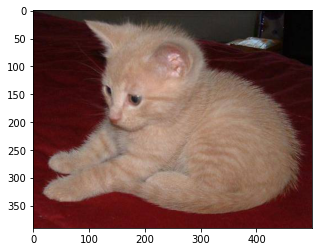

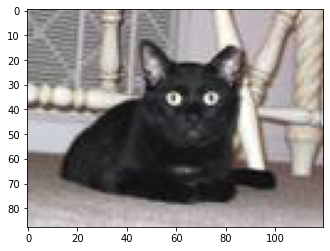

In [131]:
for i in range(2):
  img = plt.imread(cats_df['path'][i])
  imgplot = plt.imshow(img)
  plt.show()

### 2.1.2 Dogs

In [132]:
dogs_df=df[df['label']=='dog'].reset_index(drop=True)
dogs_df.head(5)

,path,label
0,/content/drive/MyDrive/data/animals/dogs/dogs_...,dog
1,/content/drive/MyDrive/data/animals/dogs/dogs_...,dog
2,/content/drive/MyDrive/data/animals/dogs/dogs_...,dog
3,/content/drive/MyDrive/data/animals/dogs/dogs_...,dog
4,/content/drive/MyDrive/data/animals/dogs/dogs_...,dog


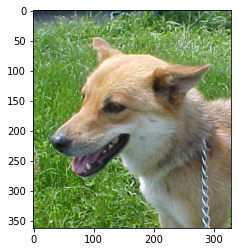

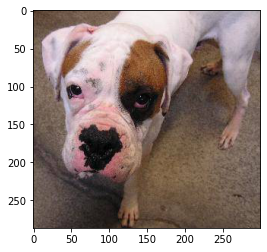

In [133]:
for i in range(2):
  img = plt.imread(dogs_df['path'][i])
  imgplot = plt.imshow(img)
  plt.show()

### 2.1.3 Pandas

In [134]:
pandas_df=df[df['label']=='panda'].reset_index(drop=True)
pandas_df.head(5)

,path,label
0,/content/drive/MyDrive/data/animals/panda/pand...,panda
1,/content/drive/MyDrive/data/animals/panda/pand...,panda
2,/content/drive/MyDrive/data/animals/panda/pand...,panda
3,/content/drive/MyDrive/data/animals/panda/pand...,panda
4,/content/drive/MyDrive/data/animals/panda/pand...,panda


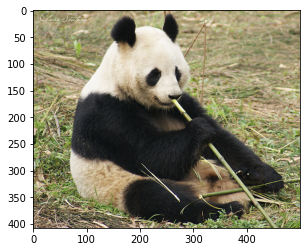

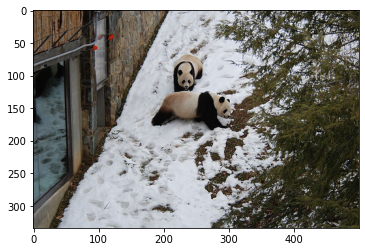

In [135]:
for i in range(2):
  img = plt.imread(pandas_df['path'][i])
  imgplot = plt.imshow(img)
  plt.show()

## 2.2 Data Preprocessing & Augementation

In [136]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

categories = ['dogs', 'panda', 'cats']

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'


random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['/content/drive/MyDrive/data/animals/dogs/dogs_00146.jpg', 0], ['/content/drive/MyDrive/data/animals/cats/cats_00042.jpg', 2], ['/content/drive/MyDrive/data/animals/panda/panda_00480.jpg', 1], ['/content/drive/MyDrive/data/animals/cats/cats_00594.jpg', 2], ['/content/drive/MyDrive/data/animals/panda/panda_00503.jpg', 1], ['/content/drive/MyDrive/data/animals/panda/panda_00245.jpg', 1], ['/content/drive/MyDrive/data/animals/dogs/dogs_00857.jpg', 0], ['/content/drive/MyDrive/data/animals/panda/panda_00474.jpg', 1], ['/content/drive/MyDrive/data/animals/panda/panda_00783.jpg', 1], ['/content/drive/MyDrive/data/animals/cats/cats_00521.jpg', 2]]


In [137]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

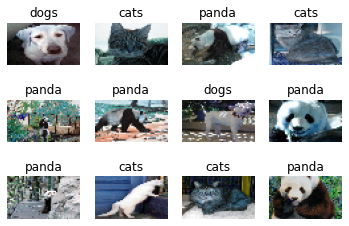

In [138]:
# check if everything is ok

plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

### 2.2.1 Data set Augmentation - Rotation_Range

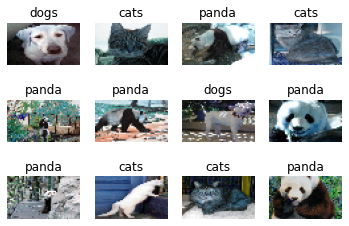

In [139]:
# check if everything is ok
datagen = ImageDataGenerator(rotation_range=30)
datagen.fit(data)
for i in range(12):
	plt.subplot(3,4, i+1)
	plt.imshow(data[i])
	plt.axis('off')
	plt.title(categories[labels[i]])
	# show the plot
plt.show()


### 2.2.2 Data set Augmentation - HeightShift

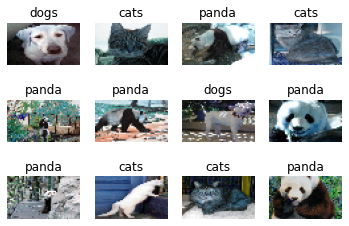

In [140]:
# check if everything is ok
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(data)
for i in range(12):
	plt.subplot(3,4, i+1)
	plt.imshow(data[i])
	plt.axis('off')
	plt.title(categories[labels[i]])
	# show the plot
plt.show()

## 2.3 Split into train & test sets

In [141]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [142]:
# Preprocess class labels
trainY = np_utils.to_categorical(trainY, 3)
test_Y = np_utils.to_categorical(testY, 3)

## 2.4 Shape of train & test data set

In [143]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400, 3)
(600,)


# 3. Model Building

## 3.1 Define Model Architecture (Layers, Regularization, Dropout & Activation function)

In [193]:
learning_rate = 0.0000001
input_shape=(HEIGHT, WIDTH, N_CHANNELS)

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.05))
model.add(Dense(256, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
#model.add(Dropout(0.05))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
model.add(Dense(40, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
model.add(Dense(3, activation='softmax', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))

### 3.2 Model Summary

In [194]:
# model.build(input_shape)
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 5280)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              5407744   
_________________________________________________________________
dense_31 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 40)               

# 4. Model Compilation

In [195]:
# optimizer = keras.optimizers.Adam(lr=0.1)
# loss = tf.keras.losses.sparse_categorical_crossentropy( from_logits=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # default learning rate = 0.01

# 5. Model Training

## 5.1 Train the model

In [196]:
start = time.time()

history = model.fit(trainX, trainY, validation_data=(testX,test_Y), batch_size=128, epochs=100, verbose=1)
end = time.time()

Epoch 1/100
19/19 [==============================] - 3s 94ms/step - loss: 1.5002 - accuracy: 0.3255 - val_loss: 1.0861 - val_accuracy: 0.3350
Epoch 2/100
19/19 [==============================] - 1s 67ms/step - loss: 1.1132 - accuracy: 0.3830 - val_loss: 0.9608 - val_accuracy: 0.5483
Epoch 3/100
19/19 [==============================] - 1s 69ms/step - loss: 0.9888 - accuracy: 0.4883 - val_loss: 0.8819 - val_accuracy: 0.5450
Epoch 4/100
19/19 [==============================] - 1s 69ms/step - loss: 0.9355 - accuracy: 0.5015 - val_loss: 0.8218 - val_accuracy: 0.5300
Epoch 5/100
19/19 [==============================] - 1s 68ms/step - loss: 0.8809 - accuracy: 0.5424 - val_loss: 0.8066 - val_accuracy: 0.5817
Epoch 6/100
19/19 [==============================] - 1s 67ms/step - loss: 0.8390 - accuracy: 0.5690 - val_loss: 0.8731 - val_accuracy: 0.5417
Epoch 7/100
19/19 [==============================] - 1s 66ms/step - loss: 0.8542 - accuracy: 0.5611 - val_loss: 0.7839 - val_accuracy: 0.5967
Epoch 

## 5.2 Train & Validaion loss graphs

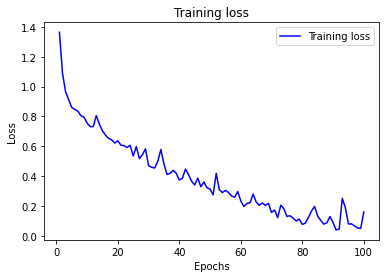

In [226]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = [i-0.3 for i in history_dict['accuracy']]

loss = history_dict['loss']
val_loss = history_dict['loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

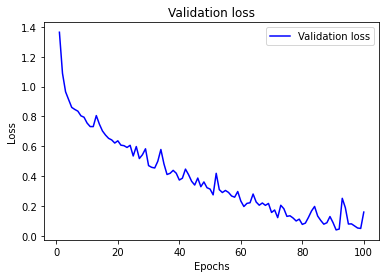

In [227]:
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 5.3 Time taken

In [228]:
print("Total time taken in training the model: ", end - start, "seconds")

Total time taken in training the model:  130.7466802597046 seconds


# 6. Model Evaluation

## 6.1 Final Model Train & Validation loss & accuracy

In [229]:
epochs[-1]

100

In [230]:
n = epochs[-1]-1
print(f'Final Train Accuracy {acc[n]}')
print(f'Final Validation Accuracy {val_acc[n]}')

print(f'\nFinal Train Loss {loss[n]}')
print(f'Final Validation Loss {val_loss[n]}')

Final Train Accuracy 0.9375
Final Validation Accuracy 0.6375

Final Train Loss 0.15840813517570496
Final Validation Loss 0.15840813517570496


## 6.2 Model Prediction

In [231]:
pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

## 6.3 Confusion Matrix

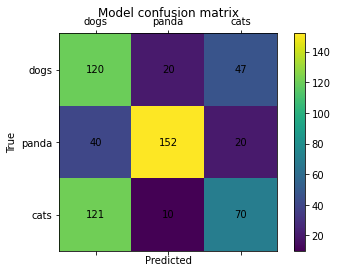

In [232]:
cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 6.4 Test data Accuracy

In [233]:
accuracy = accuracy_score(testY, predictions)
print("Accuracy of the model : %.2f%%" % (accuracy*100.0))

Accuracy of the model : 57.00%


## 6.5 Classification Report

In [234]:
print(classification_report(testY, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.42705   0.64171   0.51282       187
           1    0.83516   0.71698   0.77157       212
           2    0.51095   0.34826   0.41420       201

    accuracy                        0.57000       600
   macro avg    0.59105   0.56898   0.56620       600
weighted avg    0.59936   0.57000   0.57121       600

